In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

#importing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('data_clean.csv')

In [3]:
df.isnull().sum()

text      17
target     0
dtype: int64

In [4]:
df.dropna(inplace = True)

In [5]:
#Separate data into comment text (features) and subreddit (target variable)
X = df['text']
y = df['target']

#Train test split. Stratify=y guarantees that class balance will be maintained across train and test bloc
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,stratify=y)

In [6]:
#baseline model
y.value_counts(normalize=True)

0    0.213017
1    0.211245
4    0.197643
3    0.195738
2    0.182358
Name: target, dtype: float64

In [13]:
#add removed and deleted to stopwords
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['removed', 'deleted']

text.ENGLISH_STOP_WORDS = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [8]:
models_gr_cv = [ # list of pipeline steps for each model combo
    [('cv',CountVectorizer()),('multi_nb',MultinomialNB())],
    [('cv',CountVectorizer()),('scaler',StandardScaler(with_mean=False)),('knn',KNeighborsClassifier())], 
    [('cv',CountVectorizer()),('scaler',StandardScaler(with_mean=False)),('logreg',LogisticRegression())],
    [('cv',CountVectorizer()),('rf',RandomForestClassifier())],
    [('cv',CountVectorizer()),('ada',AdaBoostClassifier())],
    [('cv',CountVectorizer()),('gb',GradientBoostingClassifier())],
    [('cv',CountVectorizer()),('sv',SVC())]
]

models = ['multi_nb','knn','logreg','rf','ada','gb', 'svc']

pipe_params_cv = [
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]},
    {"cv__stop_words":['english'], "cv__ngram_range":[(1,1),(1,2)]}
]


In [9]:
results = pd.DataFrame(columns=['model','best_params','train_accuracy','test_accuracy'])
results.head()

,model,best_params,train_accuracy,test_accuracy


In [10]:
for i in tqdm(range(len(models_gr_cv))):           # timed loop through index of number of steps
    pipe = Pipeline(steps=models_gr_cv[i])         # configure pipeline for each model
    grid = GridSearchCV(pipe, pipe_params_cv[i], cv=2) # fit GridSearchCV to model and model's params

    model_results = {}

    grid.fit(X_train, y_train)
    
    print('Model: ',models[i])
    model_results['model'] = models[i]

    print('Best Params: ', grid.best_params_)
    model_results['best_params'] = grid.best_params_

    print('Train Accuracy:', grid.score(X_train, y_train), '\n')
    model_results['train_accuracy'] = grid.score(X_train, y_train)
    
    print('Test Accuracy:', grid.score(X_test, y_test), '\n')
    model_results['test_accuracy'] = grid.score(X_test, y_test)

    results = results.append(model_results, ignore_index=True)

  0%|          | 0/7 [00:00<?, ?it/s]

Model:  multi_nb
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
Train Accuracy: 0.8570415879017014 



 14%|█▍        | 1/7 [00:01<00:10,  1.77s/it]

Test Accuracy: 0.7547403863193337 

Model:  knn
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
Train Accuracy: 0.6460302457466919 

Test Accuracy: 0.4875066454013822 



 29%|██▊       | 2/7 [00:24<01:10, 14.03s/it]

Model:  logreg
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
Train Accuracy: 0.9874172967863895 



 43%|████▎     | 3/7 [00:41<01:02, 15.59s/it]

Test Accuracy: 0.6914761651603757 

Model:  rf
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
Train Accuracy: 0.9898393194706995 

Test Accuracy: 0.7533227006911217 



 57%|█████▋    | 4/7 [02:12<02:15, 45.31s/it]

Model:  ada
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': 'english'}
Train Accuracy: 0.6561318525519849 



 71%|███████▏  | 5/7 [02:18<01:02, 31.12s/it]

Test Accuracy: 0.6519581782739677 

Model:  gb
Best Params:  {'cv__ngram_range': (1, 2), 'cv__stop_words': 'english'}
Train Accuracy: 0.7407254253308129 



 86%|████████▌ | 6/7 [03:35<00:46, 46.50s/it]

Test Accuracy: 0.7091972355130249 

Model:  svc
Best Params:  {'cv__ngram_range': (1, 1), 'cv__stop_words': 'english'}
Train Accuracy: 0.8766540642722117 

Test Accuracy: 0.7410951621477937 



100%|██████████| 7/7 [05:06<00:00, 43.74s/it]


# Results

In [11]:
grid_results_cv = results

In [12]:
results.sort_values('test_accuracy',ascending=False)

,model,best_params,train_accuracy,test_accuracy
0,multi_nb,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.857042,0.754740
3,rf,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.989839,0.753323
6,svc,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.876654,0.741095
5,gb,"{'cv__ngram_range': (1, 2), 'cv__stop_words': ...",0.740725,0.709197
2,logreg,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.987417,0.691476
4,ada,"{'cv__ngram_range': (1, 2), 'cv__stop_words': ...",0.656132,0.651958
1,knn,"{'cv__ngram_range': (1, 1), 'cv__stop_words': ...",0.646030,0.487507


#### From this, we can state that our 3 most promising models are Random forest, MultiNomial, and Support Vector Machine. Adaboost also looks promising due to its very low variability. We can now optimize for these models much further.

## Model 1: MultiNomial Naive Bayes 

In [68]:
pipe = Pipeline([('cvec', CountVectorizer(stop_words = 'english')), 
               ('mnb', MultinomialNB())])

In [69]:
mb_pipe_params = {'cvec__max_features' : [None, 5000, 10000, 20000],
                  'cvec__max_df' : [0.9, 0.95],
                  'cvec__min_df' : [2, 3],
                  'cvec__ngram_range' : [(1, 1), (1, 2)],
                  'mnb__alpha' :np.arange(.1,1,1.5)}

In [89]:
mnb_post_results = {} 

grid = GridSearchCV(pipe, mb_pipe_params, cv=3) 
grid.fit(X_train, y_train) 

print('Train Accuracy: ',grid.score(X_train, y_train))
mnb_post_results['train_accuracy'] = grid.score(X_train, y_train) 

print('Test Accuracy: ',grid.score(X_test, y_test))
mnb_post_results['test_accuracy'] = grid.score(X_test, y_test) 

print('BP: ',grid.best_params_)
mnb_post_results['bp'] = grid.best_params_ 

Train Accuracy:  0.8842745746691871
Test Accuracy:  0.759170653907496
BP:  {'cvec__max_df': 0.9, 'cvec__max_features': None, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'mnb__alpha': 0.1}


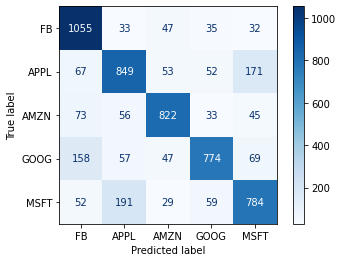

In [113]:
class_names = ['FB', 'APPL', 'AMZN', 'GOOG', 'MSFT']
disp = plot_confusion_matrix(grid.best_estimator_, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

## Model 2: Random Forest

In [116]:
pipe = Pipeline([('cvec', CountVectorizer(stop_words = 'english')), 
               ('rf', RandomForestClassifier(random_state = 42))])

In [119]:
rf_pipe_params = {'cvec__max_features' : [None, 5000, 10000],
                  'rf__n_estimators' : [100, 150, 200],
                  'rf__max_depth' : [None, 3, 5, 10],
                  'rf__min_samples_split' : [2, 3, 4, 5]}

In [120]:
rf_post_results = {}

grid = GridSearchCV(pipe, rf_pipe_params, cv=3) 
grid.fit(X_train, y_train) 

print('Train Accuracy: ',grid.score(X_train, y_train))
rf_post_results['train_accuracy'] = grid.score(X_train, y_train)

print('Test Accuracy: ',grid.score(X_test, y_test))
rf_post_results['test_accuracy'] = grid.score(X_test, y_test) 

print('BP: ',grid.best_params_)
rf_post_results['bp'] = grid.best_params_ 

Train Accuracy:  0.9831049149338374
Test Accuracy:  0.7710437710437711
BP:  {'cvec__max_features': None, 'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}


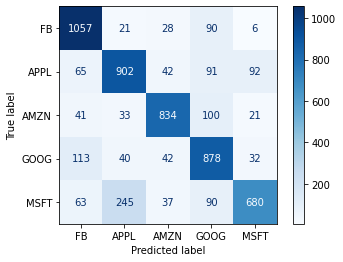

In [121]:
class_names = ['FB', 'APPL', 'AMZN', 'GOOG', 'MSFT']
disp = plot_confusion_matrix(grid.best_estimator_, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

## Model 3: Support Vector Machine

In [122]:
pipe = Pipeline([('cvec', CountVectorizer(stop_words = 'english', ngram_range = (1,2))), 
               ('svc', SVC())])

In [131]:
svc_pipe_params = {'cvec__max_features' : [None, 5000, 10000],
                   'svc__C': [1, 10, 0.1, 100],
                   'svc__kernel' : ['rbf', 'linear', 'polynomial'],
                   'svc__degree' : [2, 3, 4, 5]}

In [132]:
svc_post_results = {} 

grid = GridSearchCV(pipe, svc_pipe_params, cv=3) 
grid.fit(X_train, y_train) 

print('Train Accuracy: ',grid.score(X_train, y_train))
svc_post_results['train_accuracy'] = grid.score(X_train, y_train) 

print('Test Accuracy: ',grid.score(X_test, y_test))
svc_post_results['test_accuracy'] = grid.score(X_test, y_test) 

print('BP: ',grid.best_params_)
svc_post_results['bp'] = grid.best_params_ 

Train Accuracy:  0.9311200378071833
Test Accuracy:  0.7579301789828106
BP:  {'cvec__max_features': None, 'svc__C': 0.1, 'svc__degree': 2, 'svc__kernel': 'linear'}


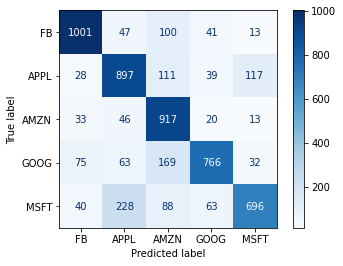

In [133]:
class_names = ['FB', 'APPL', 'AMZN', 'GOOG', 'MSFT']
disp = plot_confusion_matrix(grid.best_estimator_, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

## Model 4: AdaBoostClassifier

In [172]:
pipe = Pipeline([('cvec', CountVectorizer(stop_words = 'english', ngram_range = (1,2))), 
               ('ada', AdaBoostClassifier(base_estimator = DecisionTreeClassifier()))])

In [173]:
ada_pipe_params = {'cvec__max_features' : [None, 2000],
             'ada__n_estimators' : [50, 100, 200],
             'ada__base_estimator__splitter' :   ["best", "random"],
             'ada__base_estimator__min_samples_split' :  [2, 5, 10],
             'ada__base_estimator__min_samples_leaf' : [1, 3, 5]
            }

In [174]:
ada_post_results = {} 

grid = GridSearchCV(pipe, ada_pipe_params, cv=3, verbose = 2) 
grid.fit(X_train, y_train) 

print('Train Accuracy: ',grid.score(X_train, y_train))
ada_post_results['train_accuracy'] = grid.score(X_train, y_train) 

print('Test Accuracy: ',grid.score(X_test, y_test))
ada_post_results['test_accuracy'] = grid.score(X_test, y_test) 

print('BP: ',grid.best_params_)
ada_post_results['bp'] = grid.best_params_ 

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None, total=  12.8s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.8s remaining:    0.0s


[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None, total=  20.6s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None, total=  12.1s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=2000, total=   1.9s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_es

[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None, total=  16.7s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None, total=  25.8s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None, total=  16.0s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=

[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=2000, total=   2.3s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None, total=  18.2s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None, total=  25.5s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__ba

[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=2000, total=   3.2s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=2000, total=   3.4s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None, total=  15.2s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, 

[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=2000, total=   2.1s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=2000, total=   2.0s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=2000, total=   2.0s
[CV] ada__base_estimator__min_samples_leaf=1, ada__base_estimator__min_samples_split=

[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=None, total=  21.9s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=2000, total=   3.3s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=2000, total=   3.4s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__ba

[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=None, total=  25.0s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=None, total=  27.1s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=2000, total=   4.0s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=

[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=None, total=  20.4s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=None, total=  21.8s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=50, cvec__max_features=None, total=  21.9s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=5, ad

[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=2000, total=   2.8s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=None, total=  21.4s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=100, cvec__max_features=None, total=  22.0s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ad

[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=2000, total=   3.3s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=2000, total=   3.0s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=None, total=  22.6s
[CV] ada__base_estimator__min_samples_leaf=3, ada__base_estimator__min_samples_s

[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=2000, total=   4.8s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=2000, total=   5.3s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=2, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=2000, total=   4.8s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=2, ada__ba

[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=None, total=  20.2s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=2000, total=   3.3s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=best, ada__n_estimators=50, cvec__max_features=2000, total=   3.4s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_es

[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None, total=  22.0s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=None, total=  21.5s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=2000 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=5, ada__base_estimator__splitter=random, ada__n_estimators=100, cvec__max_features=2000, total=   3.3s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=

[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None, total=  24.9s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None, total=  28.7s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None 
[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=best, ada__n_estimators=200, cvec__max_features=None, total=  27.0s
[CV] ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=10, a

[CV]  ada__base_estimator__min_samples_leaf=5, ada__base_estimator__min_samples_split=10, ada__base_estimator__splitter=random, ada__n_estimators=200, cvec__max_features=2000, total=   3.8s


[Parallel(n_jobs=1)]: Done 324 out of 324 | elapsed: 67.3min finished


Train Accuracy:  0.9895439508506616
Test Accuracy:  0.7269183058656743
BP:  {'ada__base_estimator__min_samples_leaf': 1, 'ada__base_estimator__min_samples_split': 2, 'ada__base_estimator__splitter': 'random', 'ada__n_estimators': 50, 'cvec__max_features': None}


In [176]:
ada_post_results['train_accuracy']

0.9895439508506616

In [177]:
ada_post_results['test_accuracy']

0.7269183058656743

In [175]:
grid.best_params_

{'ada__base_estimator__min_samples_leaf': 1,
 'ada__base_estimator__min_samples_split': 2,
 'ada__base_estimator__splitter': 'random',
 'ada__n_estimators': 50,
 'cvec__max_features': None}

In [178]:
grid.best_score_

0.7219407225066533

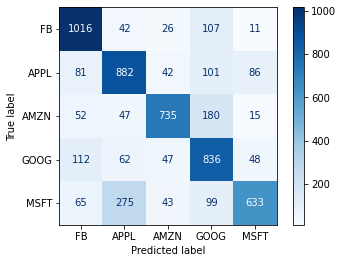

In [179]:
class_names = ['FB', 'APPL', 'AMZN', 'GOOG', 'MSFT']
disp = plot_confusion_matrix(grid.best_estimator_, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
plt.show()

# Final Model: VotingClassifier using Stacking

### Optimized Model Features
#### Model 1: Multinomial Naive-Bayes

- Lemmatizer
- CountVectorizer
- stop_words='english'
- max_df = 0.9
- min_df = 2
- max_features = None
- ngram_range=(1,2)
- mnb__alpha =0.1 


#### Model 2: Random Forest

- Lemmatizer
- CountVectorizer
- stop_words='english'
- ngram_range=(1,2)
- max_features = None
- rf_min_samples_split = 5
- rf_max_depth = None
- rf_n_estimators = 200

#### Model 3: Support Vector Machine

- Lemmatizer
- CountVectorizer
- stop_words='english'
- ngram_range=(1,2)
- max_features = None
- svc_C = 0.1
- svc_degree = 2
- svc_kernel = linear

In [196]:
from sklearn.ensemble import VotingClassifier

pipe_1 = Pipeline([('cvec', CountVectorizer(stop_words = 'english', max_df = 0.9, min_df = 2, ngram_range= (1,2))), 
               ('mnb', MultinomialNB(alpha= 0.1))])
pipe_2 = Pipeline([('cvec', CountVectorizer(stop_words = 'english', ngram_range= (1,2), max_features= None)), 
               ('rf', RandomForestClassifier(random_state = 42, min_samples_split= 5, max_depth=None, n_estimators = 200))])
pipe_3 = Pipeline([('cvec', CountVectorizer(stop_words = 'english', ngram_range = (1,2))), 
               ('svc', SVC(C=0.1, degree= 2, kernel= 'linear'))])

pipe_4 = Pipeline([('cv',CountVectorizer(stop_words = 'english')),
                  ('scaler',StandardScaler(with_mean=False)),
                  ('logreg',LogisticRegression())])

pipe_5 = Pipeline([('cv',CountVectorizer()),('ada',AdaBoostClassifier(base_estimator= DecisionTreeClassifier(min_samples_leaf= 1,
                                                                                                   min_samples_split = 2,
                                                                                                   splitter= 'random'),n_estimators=50))])

pipe_6 = Pipeline([('cv',CountVectorizer(stop_words = 'english', ngram_range= (1,2))),('gb',GradientBoostingClassifier())])

In [203]:
model = VotingClassifier([
    ('mnb', pipe_1),
    ('rf', pipe_2),
    ('svc', pipe_3),
    ('lr', pipe_4),
    ('ada', pipe_5),
    ('gr', pipe_6)
], voting= 'soft')

In [199]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('mnb',
                              Pipeline(steps=[('cvec',
                                               CountVectorizer(max_df=0.9,
                                                               min_df=2,
                                                               ngram_range=(1,
                                                                            2),
                                                               stop_words='english')),
                                              ('mnb',
                                               MultinomialNB(alpha=0.1))])),
                             ('rf',
                              Pipeline(steps=[('cvec',
                                               CountVectorizer(ngram_range=(1,
                                                                            2),
                                                               stop_words='english')),
                                              

In [200]:
model.score(X_train, y_train)

0.9760160680529301

In [201]:
model.score(X_test, y_test)

0.7756512493354598

### Soft Voting

In [208]:
#make probability = True for soft voting
pipe_3 = Pipeline([('cvec', CountVectorizer(stop_words = 'english', ngram_range = (1,2))), 
               ('svc', SVC(C=0.1, degree= 2, kernel= 'linear', probability= True))])

model = VotingClassifier([
    ('mnb', pipe_1),
    ('rf', pipe_2),
    ('svc', pipe_3),
    ('lr', pipe_4),
    ('ada', pipe_5),
    ('gr', pipe_6)
], voting= 'soft')

In [209]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('mnb',
                              Pipeline(steps=[('cvec',
                                               CountVectorizer(max_df=0.9,
                                                               min_df=2,
                                                               ngram_range=(1,
                                                                            2),
                                                               stop_words='english')),
                                              ('mnb',
                                               MultinomialNB(alpha=0.1))])),
                             ('rf',
                              Pipeline(steps=[('cvec',
                                               CountVectorizer(ngram_range=(1,
                                                                            2),
                                                               stop_words='english')),
                                              

In [210]:
model.score(X_train, y_train)

0.9848180529300568

In [211]:
model.score(X_test, y_test)

0.795498848130427